In [ ]:
#hide
import sys
sys.path.append('..')
import pandas as pd
%load_ext autoreload
%autoreload 2

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Fastseq

> A way to use fastai with sequence data

## Installing

Please install [fastai](https://dev.fast.ai/#Installing) according to the instructions.

Then install Fastseq by:
```
pip install -e .
```

## How to use

In [ ]:
from fastai.basics import *
from fastseq.all import *
from fastseq.nbeats.model import *
from fastseq.nbeats.learner import *
horizon, lookback = 7, 35    

Getting the data fastai style:

In [ ]:
path = untar_data(URLs.m4_daily)
data = TSDataLoaders.from_folder(path, horizon = horizon, lookback = lookback, nrows = 300, step=3, max_std=5)

torch.Size([1, 1020])
Train:70707; Valid: 1200; Test 300


In [ ]:
items = dummy_data_generator(60, 10, nrows=300)
data = TSDataLoaders.from_items(items,horizon = horizon, lookback = lookback, step=5, valid_pct=.2)

(1, 70)
Train:900; Valid: 300; Test 300


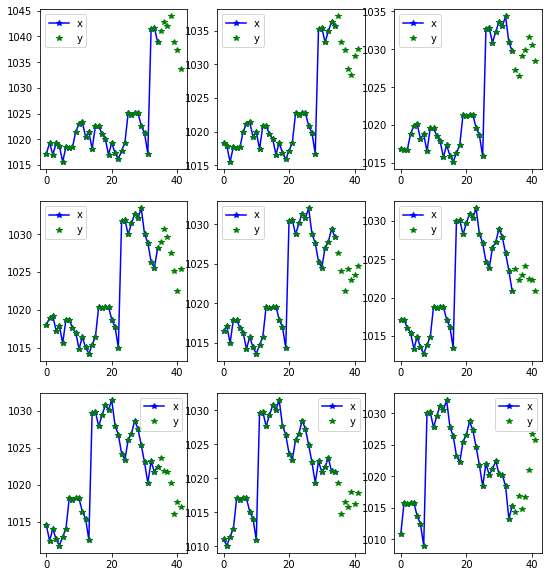

In [ ]:
data.show_batch()

In [ ]:
learn = nbeats_learner(data)   
learn.loss_func = F.mse_loss

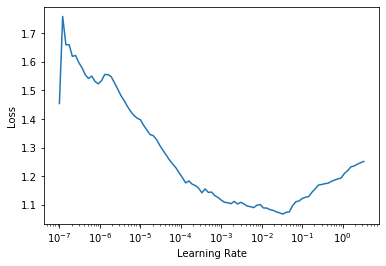

In [ ]:
from fastai.callback.all import *
learn.lr_find()

epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,89099493376.000000,40178564355588096.000000,2678572.250000,1.338966,2.297979,2.669129,01:03
1,89099493376.000000,40178564355588096.000000,2678572.000000,1.211376,1.366221,2.282180,01:04
2,89099493376.000000,40178564355588096.000000,2678572.000000,1.223834,1.081451,2.243631,01:04
3,89099493376.000000,40178564355588096.000000,2678572.000000,1.177294,1.120751,2.100371,01:03
4,89099493376.000000,40178564355588096.000000,2678572.000000,1.314264,1.124228,1.692214,01:02
5,89099493376.000000,40178564355588096.000000,2678572.000000,1.159451,0.857838,2.081565,01:02
6,89099493376.000000,40178564355588096.000000,2678572.000000,1.109771,0.729751,2.443883,01:03
7,89099493376.000000,40178564355588096.000000,2678572.000000,1.047900,0.622119,2.304536,01:03
8,89099493376.000000,40178564355588096.000000,2678572.000000,1.119721,0.803722,3.010465,01:02
9,89099493376.000000,40178564355588096.000000,2678571.750000,1.003480,0.579269,3.325524,01:02


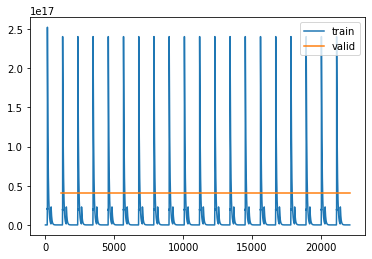

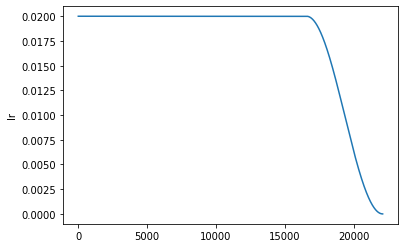

In [ ]:
learn.fit_flat_cos(20, 2e-2)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

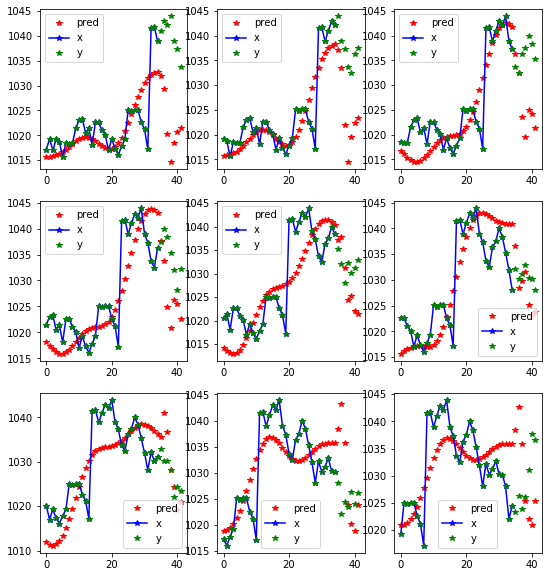

In [ ]:
learn.show_results(0)

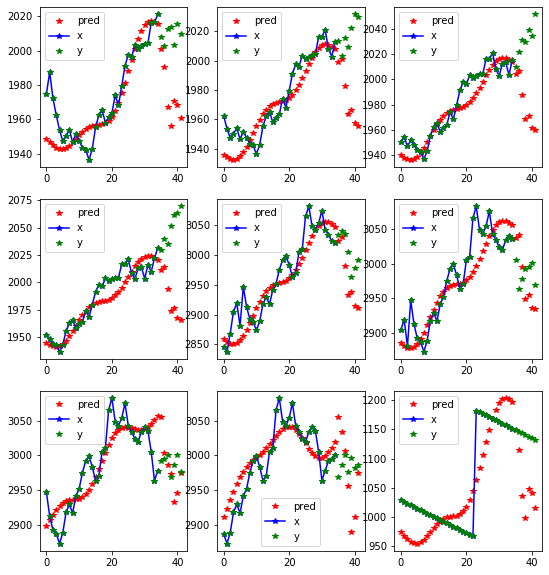

In [ ]:
learn.show_results(1)

epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,89099493376.000000,40178564355588096.000000,2678571.750000,0.935339,0.388958,3.077687,00:59
1,89099493376.000000,40178564355588096.000000,2678571.750000,0.925955,0.373639,3.110069,01:02
2,89099493376.000000,40178564355588096.000000,2678571.750000,0.927628,0.375093,3.114847,01:00
3,89099493376.000000,40178564355588096.000000,2678571.750000,0.924539,0.368273,3.110584,01:00
4,89099493376.000000,40178564355588096.000000,2678571.750000,0.924928,0.370581,3.112593,01:01


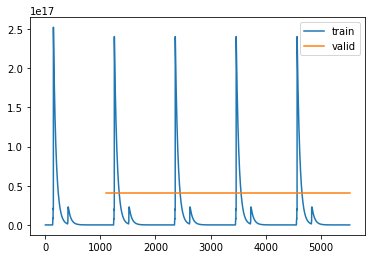

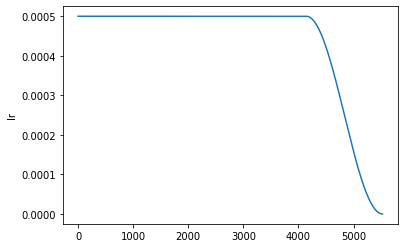

In [ ]:
learn.fit_flat_cos(5,5e-4)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

## Interperation

In [ ]:
learn.n_beats_attention.means()

,trend0_0,trend0_1,seasonality1_0,seasonality1_1,seasonality1_2,seasonality1_3
theta_0_mean,0.19999991,-0.03226429,0.41529083,2.0,-2.0,0.0
theta_0_std,0.0,0.19851254,1.5415518,0.0,0.0,0.0
theta_1_mean,0.019999994,-0.003333331,0.06447833,-0.41679278,1.0,-0.87826747
theta_1_std,0.0,0.01992895,0.17828065,0.49811634,0.0,0.32615158
theta_2_mean,0.0,0.0,3.8246313e-07,2.0,-0.19957328,0.0
theta_2_std,0.0,0.0,1.0195507e-06,0.0,0.24590762,0.0
att_mean,0.666667,0.487713,0.20626,0.750742,0.662271,0.479188
att_std,0.471405,0.48803,0.399251,0.430672,0.469666,0.499546
theta_3_mean,NaN,0.0,NaN,0.6041674,-0.5184,-2.0
theta_3_std,NaN,0.0,NaN,0.49420312,0.8699833,0.0


In [ ]:
# hide
from fastai.interpret import *
from fastseq.nbeats.interpret import *

In [ ]:
# hide
interp = NBeatsInterpretation.from_learner(learn)

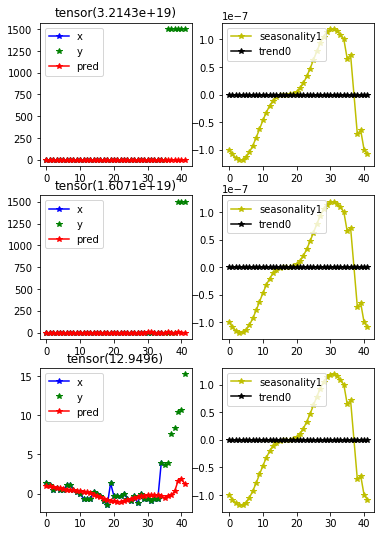

In [ ]:
# hide
interp.plot_top_losses(3, combine_stack=True)